### Lecture03 

### 1.分析泰坦尼克数据

In [2]:
database = 'F:/NLP-dataset/titanic/train.csv'

In [3]:
import os

In [4]:
os.path.exists(database)

True

In [5]:
import pandas as pd

In [18]:
content = pd.read_csv(database)

In [21]:
content.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
content  = content.dropna()

In [30]:
fares = content['Fare'].tolist()

In [26]:
ages = content['Age'].tolist()

In [27]:
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline

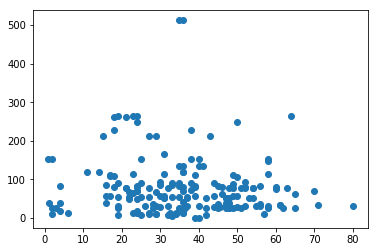

In [31]:
plt.scatter(ages, fares)

In [32]:
age_with_fares = content[
    (content['Age'] > 22) & (content['Fare'] < 400) & (content['Fare'] > 130)
]

In [39]:
sub_fare = age_with_fares['Fare'].tolist()
sub_age = age_with_fares['Age'].tolist()

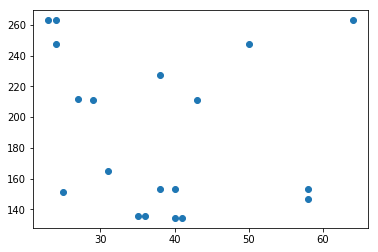

In [40]:
plt.scatter(sub_age
           ,sub_fare)

In [50]:
import numpy as np

In [49]:
np.mean(np.where((content['Age']>10) & (content['Age']<20)))

108.05263157894737

In [59]:
print(content['Age'].max())
print(content['Age'].min())

80.0
0.92


每隔10岁的费用均值来代替，如10-20平均为15岁的的费用均值

In [60]:
def get_sub_bin_fare():
    sub_bin_fare = []
    average_age = []
    for i in range(10,80,10):
        sub_bin_fare.append(np.mean(np.where((content['Age']>i) & (content['Age']<(i+10)))))
        average_age.append(i+5)
    return sub_bin_fare,average_age

In [61]:
sub_fare, average_age = get_sub_bin_fare()

In [62]:
sub_fare

[108.05263157894737,
 85.13888888888889,
 94.08888888888889,
 102.48275862068965,
 95.75,
 61.857142857142854,
 15.0]

In [63]:
average_age

[15, 25, 35, 45, 55, 65, 75]

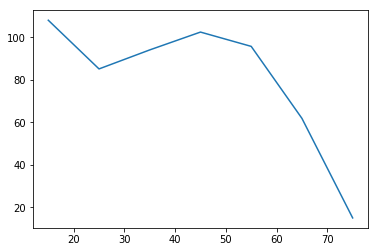

In [64]:
plt.plot(average_age, sub_fare)

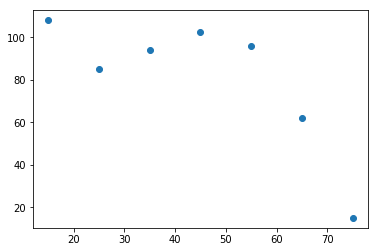

In [65]:
plt.scatter(average_age, sub_fare)

### 2.根据中国程使做一个简易版的导航地图

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re

In [3]:
city_location = {}

In [4]:
for line in coordination_source.split('\n'):
    if line.startswith('//'): continue
    if line.strip() == '': continue
    city = re.findall("name:'(\w+)'",line)[0]
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
    x_y = tuple(map(float,x_y))
    city_location[city] = x_y
    print(city,x_y)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


In [5]:
import math

In [6]:
def geo_distance(origin, dest):
    lat1, lon1 = origin
    lat2,lon2 = dest
    radius = 6371
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

In [7]:
def get_city_distance(city1,city2):
    return geo_distance(city_location[city1],city_location[city2])

In [8]:
get_city_distance('杭州','上海')

153.5185697155768

In [9]:
import networkx as nx

In [10]:
cities = list(city_location.keys())

In [11]:
city_graph = nx.Graph()

In [12]:
city_graph.add_nodes_from(cities)

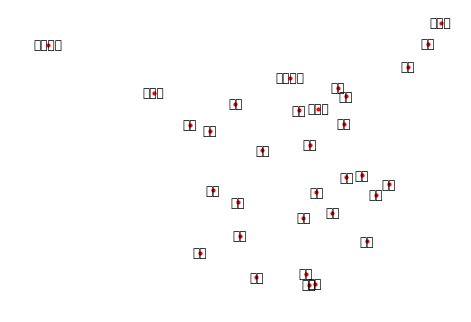

In [16]:
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [90]:
import matplotlib
print(matplotlib.__path__)

['D:\\Program Files\\Anaconda3\\lib\\site-packages\\matplotlib']
